In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/train.csv")

emo_feature = []
emo_target = []

for i in range(len(df)):
    emo_feature.append([df['mouth_distance'][i], df['average_distance'][i]])
    emo_target.append([df['emotion'][i]])
    # dictionary.update({df.index[i]: i})

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy feature
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

0


C:\Users\omsin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: predict_proba is not available when  probability=False

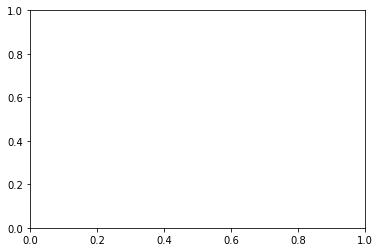

In [2]:
import pickle
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedGroupKFold

# run classifier with k-flod cross validation and plot ROC curve
cv = StratifiedGroupKFold(n_splits=5, shuffle=False)

# check score many model
score_lr = []
score_svm_l = []
score_svm_p = []
score_svm_r = []
score_rf = []

history_svm_l = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    print(i)

    # fit model
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    clf.fit(X_train, np.ravel(y_train,order='C'))

    # save model
    with open('model/svm_l', 'wb') as f:
        pickle.dump(clf, f)

    # predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # store model report in history list
    history_svm_l.append(classification_report(y_val, predict))

    # get loss and acc
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f"Fold {i + 1}")
    print(f"accuracy_score: {acc}")
    print(f"log_loss: {loss}")

    viz = plot_roc_curve(clf, X[val], y[val], name=f"ROC fold {i + 1}", alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    print(f"{i} Yeah")


In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print(clf.score(X_val, y_val))

clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)
print(clf.score(X_val, y_val))

clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
print(clf.score(X_val, y_val))

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_val, y_val))

rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
print(rf.score(X_val, y_val))

C:\Users\omsin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
